In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import zipfile
import PIL
import os

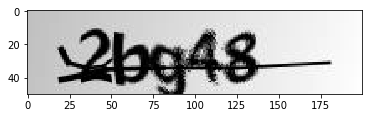

In [2]:
img = cv2.imread('2bg48.png', 0)
plt.imshow(img, 'gray')

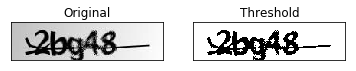

In [3]:
# Otsu thresholding
ret2, th2 = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

titles = ['Original','Otsu']
images = [img, th2]
for i in range(2):
    plt.subplot(2, 2, i + 1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

plt.title('Threshold')
plt.show()

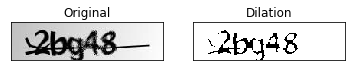

In [4]:
# Dilation
kernel = np.ones((3,3), np.uint8)
dilation2 = cv2.dilate(th2, kernel, iterations=1)

titles2 = ['Original', "Otsu"]
images2 = [img, dilation2]

for i in range(2):
    plt.subplot(2, 2, i + 1), plt.imshow(images2[i], 'gray')
    plt.title(titles2[i])
    plt.xticks([]), plt.yticks([])
    
plt.title('Dilation')
plt.show()

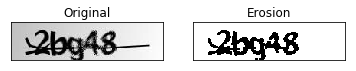

In [5]:
# Erosion
erosion2 = cv2.erode(dilation2, kernel, iterations=1)

titles3 = ['Original',"Otsu"]
images3 = [img, erosion2]

for i in range(2):
    plt.subplot(2, 2, i + 1), plt.imshow(images3[i], 'gray')
    plt.title(titles3[i])
    plt.xticks([]), plt.yticks([])
    
plt.title('Erosion')
plt.show()

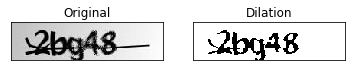

In [6]:
kernel = np.ones((3,1), np.uint8)
dilation2 = cv2.dilate(erosion2, kernel, iterations=1)

titles4 = ['Original', "Otsu"]
images4 = [img, dilation2]

for i in range(2):
    plt.subplot(2, 2, i + 1), plt.imshow(images4[i], 'gray')
    plt.title(titles4[i])
    plt.xticks([]), plt.yticks([])

plt.title('Dilation')
plt.show()

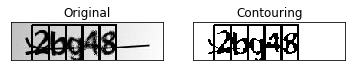

In [7]:
x, y, w, h = 27, 5, 22, 50
for  i in range(5):
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
    cv2.rectangle(dilation2, (x, y), (x + w, y + h), (0, 255, 0), 2)
    x += w

titles3 = ['Original', "Otsu"]
images3 = [img, dilation2]

for i in range(2):
    plt.subplot(2, 2, i + 1), plt.imshow(images3[i], 'gray')
    plt.title(titles3[i])
    plt.xticks([]), plt.yticks([])

plt.title('Contouring')
plt.show()

In [8]:
from PIL import Image

In [9]:
image = PIL.Image.fromarray(dilation2)
image.save('segmented.png')

In [10]:
imageobject = Image.open('segmented.png')
imageobject.show()

In [11]:
x, y, w, h = 27, 5, 22, 50
for  i in range(5):
    crop1 = imageobject.crop((x, y, x + w, y + h))
    crop1.show()
    crop1.save('{}.png'.format(i))
    x += w

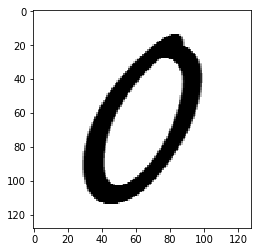

In [12]:
DATADIR = "./TrainImg/"
CATEGORIES= ["0","1","2","3","4","5","6","7","8","9","a","b","c","d","e","f","g","h","i","j","k","l","m","n","o","p","q","r","s","t","u","v","w","x","y","z"]
for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap="gray")
        break
    break

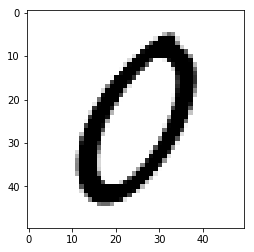

In [13]:
IMG_SIZE = 50

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap= 'gray')
plt.show()

In [14]:
train_data = []

def create_train_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category) 
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                train_data.append([new_array,class_num])
            except Exception as e:
                pass
            
create_train_data()

In [15]:
print(len(train_data))

36576


In [16]:
import random

random.shuffle(train_data)

In [17]:
for sample in train_data[:10]:
    print(sample[1])

12
22
32
2
7
11
28
24
17
15


In [18]:
X=[]
y=[]

for features, label in train_data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [19]:
import pickle

pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()
pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [20]:
pickle_in= open("X.pickle", "rb")
X = pickle.load(pickle_in)
X.shape[1:]

(50, 50, 1)

In [21]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout,Activation, Flatten, Conv2D, MaxPooling2D

X = pickle.load(open("X.pickle","rb"))
y = pickle.load(open("y.pickle","rb"))

X = X/255.0

model = Sequential()

model.add(Conv2D(64,(3,3),input_shape= X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))


model.add(Dense(36))
model.add(Activation("softmax"))

from keras.utils import to_categorical
y_binary = to_categorical(y)

model.compile(loss="categorical_crossentropy",
             optimizer="adam",
             metrics=['accuracy'])

model.fit(X,y_binary,batch_size=128, epochs=10, validation_split = 0.3)


/home/minnu/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Train on 25603 samples, validate on 10973 samples
Epoch 1/10
25603/25603 [==============================] - 150s 6ms/step - loss: 1.1561 - acc: 0.7015 - val_loss: 0.4579 - val_acc: 0.8757
Epoch 2/10
25603/25603 [==============================] - 149s 6ms/step - loss: 0.3460 - acc: 0.9041 - val_loss: 0.3327 - val_acc: 0.9032
Epoch 3/10
25603/25603 [==============================] - 149s 6ms/step - loss: 0.2561 - acc: 0.9271 - val_loss: 0.2237 - val_acc: 0.9324
Epoch 4/10
25603/25603 [==============================] - 148s 6ms/step - loss: 0.1735 - acc: 0.9478 - val_loss: 0.2329 - val_acc: 0.9306
Epoch 5/10
25603/25603 [==============================] - 151s 6ms/step - loss: 0.1587 - acc: 0.9519 - val_loss: 0.1851 - val_acc: 0.9430
Epoch 6/10
25603/25603 [==============================] - 149s 6ms/step - loss: 0.1113 - acc: 0.9661 - val_loss: 0.1436 - val_acc: 0.9552
Epoch 7/10
25603/25603 [==============================] - 149s 6ms/step - loss: 0.0909 - acc: 0.9721 - val_loss: 0.1455 - 

In [22]:
def prepare(filepath):
    IMG_SIZE = 50
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (IMG_SIZE,IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE,IMG_SIZE,1)


#model = tf.keras.models.load_model('captcha_alpha.model')
prediction = model.predict([prepare('0.png')])
#plt.imshow(new_array)

print(len(prediction[0]))
print(prediction[0])
print(CATEGORIES[np.argmax(prediction[0])])

36
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2


In [23]:
def prepare(filepath):
    IMG_SIZE = 50
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (IMG_SIZE,IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE,IMG_SIZE,1)


#model = tf.keras.models.load_model('captcha_alpha.model')
prediction = model.predict([prepare('1.png')])
#plt.imshow(new_array)

print(len(prediction[0]))
print(prediction[0])
print(CATEGORIES[np.argmax(prediction[0])])

36
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
k


In [24]:
def prepare(filepath):
    IMG_SIZE = 50
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (IMG_SIZE,IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE,IMG_SIZE,1)


#model = tf.keras.models.load_model('captcha_alpha.model')
prediction = model.predict([prepare('2.png')])
#plt.imshow(new_array)

print(len(prediction[0]))
print(prediction[0])
print(CATEGORIES[np.argmax(prediction[0])])

36
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
d


In [25]:
def prepare(filepath):
    IMG_SIZE = 50
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (IMG_SIZE,IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE,IMG_SIZE,1)


#model = tf.keras.models.load_model('captcha_alpha.model')
prediction = model.predict([prepare('3.png')])
#plt.imshow(new_array)

print(len(prediction[0]))
print(prediction[0])
print(CATEGORIES[np.argmax(prediction[0])])

36
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
9


In [26]:
def prepare(filepath):
    IMG_SIZE = 50
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (IMG_SIZE,IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE,IMG_SIZE,1)


#model = tf.keras.models.load_model('captcha_alpha.model')
prediction = model.predict([prepare('4.png')])
#plt.imshow(new_array)

print(len(prediction[0]))
print(prediction[0])
print(CATEGORIES[np.argmax(prediction[0])])

36
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
y
